In [2]:
!jt -t chesterish -T -N

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("jigsaw-toxic-comment-classification-challenge/train.csv",encoding='latin-1')
print(df.shape)

(159571, 8)


In [9]:
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [11]:
# To split only into text and result
#For the text
comment = df['comment_text']
print(comment.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [14]:
#For the other labels
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


average length of row: 394.712


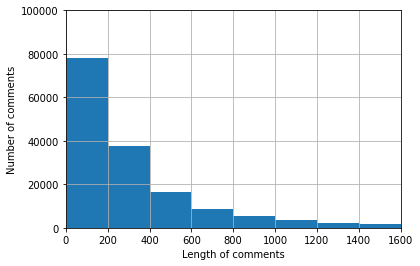

In [35]:
#For data visualization to see the average words in each row
x = [len(comment[i]) for i in range(comment.shape[0])]
print('average length of row: {:.3f}'.format(sum(x)/len(x)))
ranges = [0,200,400,600,800,1000,1200,1400,1600]
plt.hist(x, bins = ranges)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1600, 0, 100000])
plt.grid(True)
plt.show()


In [43]:
#To find length of each comment and range